In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
iris = pd.read_csv('/content/iris.csv')

In [3]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
x = iris[features].values
target = 'variety'
y = iris[target].values

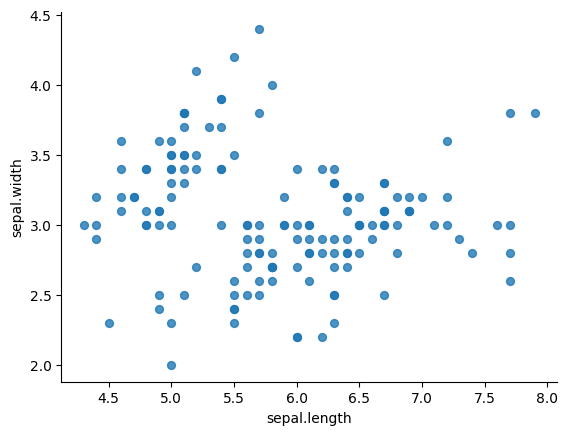

In [6]:
# @title sepal.length vs sepal.width

from matplotlib import pyplot as plt
iris.plot(kind='scatter', x='sepal.length', y='sepal.width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
#меняем классы на числа
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [11]:
cm = confusion_matrix(y_test,y_pred)

In [12]:
x.shape

(150, 4)

In [13]:
cm

array([[22,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 11]])

In [14]:
accuracy_score(y_test, y_pred)

0.9555555555555556

In [15]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

теперь пробую я

In [16]:
#idea: initializing, getting k; fitting, predict, building one prediction,

iris = pd.read_csv('/content/iris.csv')
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
x = iris[features].values
target = 'variety'
y = iris[target].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class myownknn:

    def __init__(self, k=11):
        self.k = k

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        predictions = [self._predict(x) for x in x_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.sum((x - x_train)**2) for x_train in self.x_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        most_common_label = Counter(k_labels).most_common(1)[0][0]
        return most_common_label

lessgoo = myownknn(k=11)
lessgoo.fit(x_train, y_train)
y_pred = lessgoo.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [17]:
accuracy

0.9555555555555556

In [18]:
from sklearn.datasets import load_digits

In [19]:
dig = load_digits()

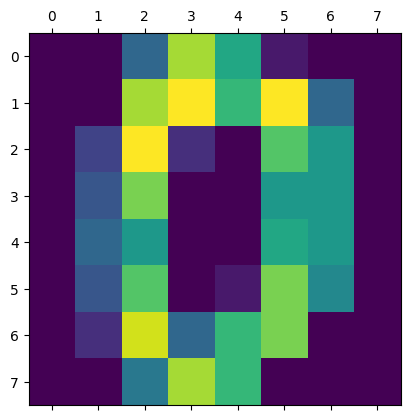

In [20]:
plt.matshow(dig.images[0])
plt.show()

In [21]:
digits = pd.DataFrame(data = dig, columns = dig['feature_names'])

In [22]:
digits['target'] = dig.target

In [23]:
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [24]:
#X = dig.feature

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.drop('target', axis = 'columns'), digits['target'], test_size = 0.3, random_state = 2)

In [26]:
# initialize class, __init__, fit, predictions, predict

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

# Загрузка данных
dig = load_digits()
digits = pd.DataFrame(data=dig.data, columns=dig.feature_names)
digits['target'] = dig.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, Y_train, Y_test = train_test_split(digits.drop('target', axis=1), digits['target'], test_size=0.3, random_state=2)

class KNNforDigits:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, Y_train):
        self.X_train = X_train.values  # Convert DataFrame to numpy array
        self.Y_train = Y_train.values  # Convert Series to numpy array

    def predict(self, X_test):
        X_test = X_test.values  # Convert DataFrame to numpy array
        predictions = [self._prediction(x) for x in X_test]
        return np.array(predictions)

    def _prediction(self, x):
        distances = [np.sum((x - self.X_train[i])**2) for i in range(len(self.X_train))]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.Y_train[j] for j in k_indices]
        most_common_label = max(set(k_labels), key=k_labels.count)
        return most_common_label

# Initialize and fit the model
knn = KNNforDigits(k=5)
knn.fit(X_train, Y_train)

# Predict the test set
Y_pred = knn.predict(X_test)

# Check the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.97


In [29]:
class KNNforDigits:
  def __init__(self, k=5):
      self.k = k

  def fit(self, X_train, Y_train):
      self.X_train = X_train.values
      self.Y_train = Y_train.values

  def predict(self, X_test):
      self.X_test = X_test.values  # Устанавливаем X_test в качестве атрибута объекта
      predictions = [self._prediction(x) for x in self.X_test]
      return np.array(predictions)

  def _prediction(self, x):
      distances = [np.sum((x - self.X_train[i])**2) for i in range(len(self.X_train))]  # Исправлено: добавлен self перед X_train
      k_indices = np.argsort(distances)[:self.k]
      k_labels = [self.Y_train[j] for j in k_indices]
      most_common_label = max(set(k_labels), key=k_labels.count)
      return most_common_label
knn = KNNforDigits(k=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

In [30]:
accuracy_score(Y_test, Y_pred)

0.9740740740740741

In [31]:
results_df = X_test.copy()
results_df['True Label'] = Y_test.values
results_df['Predicted Label'] = Y_pred

In [32]:
results_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,True Label,Predicted Label
154,0.0,0.0,0.0,3.0,16.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,12.0,0.0,0.0,0.0,4,4
564,0.0,0.0,1.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,13.0,16.0,15.0,1.0,0.0,0,0
1444,0.0,0.0,8.0,13.0,14.0,5.0,0.0,0.0,0.0,5.0,...,0.0,0.0,8.0,16.0,16.0,13.0,2.0,0.0,9,9
1394,0.0,0.0,2.0,16.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,12.0,15.0,0.0,0.0,0.0,1,1
1660,0.0,0.0,11.0,7.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,13.0,10.0,0.0,0.0,0.0,0.0,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,0.0,0.0,11.0,16.0,10.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,10.0,13.0,8.0,4.0,1.0,0.0,2,2
1321,0.0,0.0,0.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13.0,16.0,14.0,9.0,0.0,6,6
160,0.0,0.0,5.0,14.0,10.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,15.0,13.0,2.0,0.0,0.0,0,0
1205,0.0,2.0,8.0,15.0,16.0,10.0,0.0,0.0,0.0,11.0,...,0.0,0.0,7.0,16.0,14.0,1.0,0.0,0.0,0,0


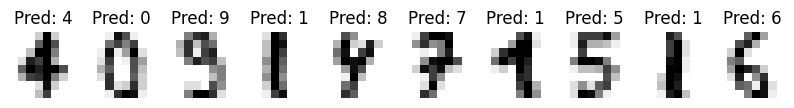

In [33]:
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for ax, image, label in zip(axes, X_test.values, Y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {label}')
plt.show()